In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

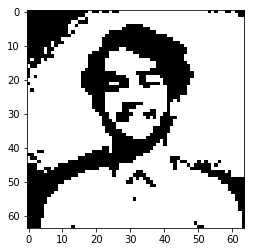

In [2]:
im = Image.open('../data/beautiful_me/me.jpeg')
size = 64, 64
im.thumbnail(size, Image.ANTIALIAS)
im_np = np.asarray(im)
im_np = np.where(im_np<128, -1, 1)
plt.imshow(im_np, cmap='gray')

In [3]:
N = im_np.shape[0]*im_np.shape[1]
P = 1
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 10

In [4]:
im_np = im_np.reshape(1, N)
epsilon = im_np

In [5]:
epsilon

array([[-1, -1, -1, ...,  1,  1, -1]])

In [6]:
epsilon.reshape(N_sqrt, N_sqrt)

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1, -1],
       [-1, -1, -1, ...,  1,  1, -1],
       [-1, -1, -1, ...,  1,  1, -1]])

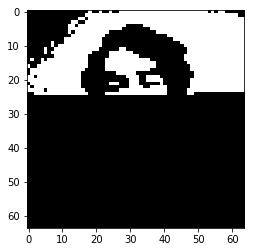

In [7]:
im = Image.open('../data/beautiful_me/me_half_masked.jpeg')
im.thumbnail(size, Image.ANTIALIAS)
im_masked_np = np.asarray(im)
try:
    im_masked_np = im_masked_np[:, :, 0]
except IndexError:
    pass
im_masked_np = np.where(im_masked_np<128, -1, 1)
im_masked_np = im_masked_np.reshape(1, N)
test_array = im_masked_np
plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

In [8]:
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        w[i, j] = (epsilon[0, i]*epsilon[0, j])
        if i==j:
            w[i, j] = 0
w /= N
w

100%|██████████| 4096/4096 [00:08<00:00, 510.84it/s]


array([[ 0.        ,  0.00024414,  0.00024414, ..., -0.00024414,
        -0.00024414,  0.00024414],
       [ 0.00024414,  0.        ,  0.00024414, ..., -0.00024414,
        -0.00024414,  0.00024414],
       [ 0.00024414,  0.00024414,  0.        , ..., -0.00024414,
        -0.00024414,  0.00024414],
       ...,
       [-0.00024414, -0.00024414, -0.00024414, ...,  0.        ,
         0.00024414, -0.00024414],
       [-0.00024414, -0.00024414, -0.00024414, ...,  0.00024414,
         0.        , -0.00024414],
       [ 0.00024414,  0.00024414,  0.00024414, ..., -0.00024414,
        -0.00024414,  0.        ]])

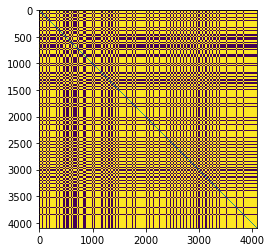

In [9]:
plt.imshow(w)

In [10]:
test_array.shape

(1, 4096)

100%|██████████| 10/10 [01:40<00:00, 10.19s/it]


array([[ 404.],
       [2745.],
       [3626.],
       [3919.],
       [4032.],
       [4075.],
       [4088.],
       [4091.],
       [4094.],
       [4095.]])

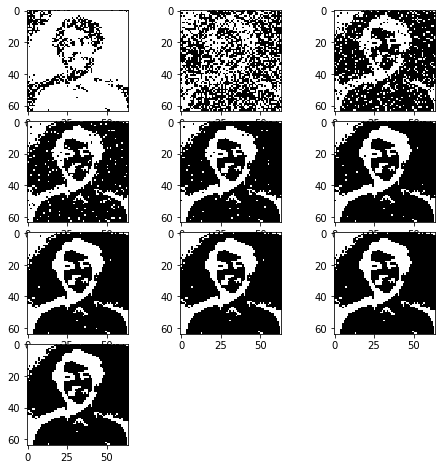

In [11]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
hamming_distance = np.zeros((NO_OF_ITERATIONS, 1))
# print(test_array.shape)
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] = w[i, j]*test_array[0, j]
    test_array = (np.where(h<0, -1, 1)).reshape(1, N)

    hamming_distance[iteration, 0] = ((epsilon - test_array)!=0).sum()
    plt.subplot(4, 3,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 256), cmap='gray')
hamming_distance

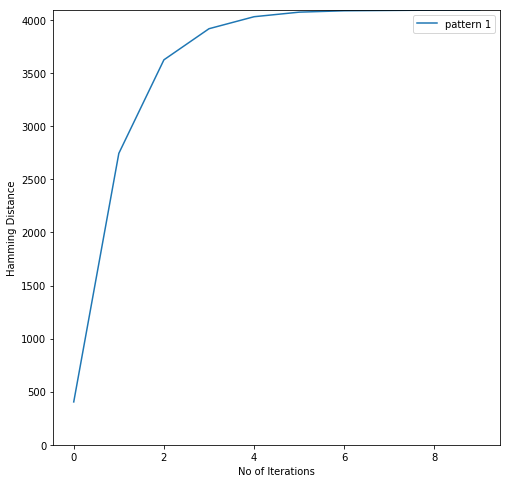

In [12]:
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 4096])
plt.legend(['pattern 1', 'pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6', 'pattern 7', 'pattern 8', 'pattern 9', 'pattern 10'],  loc='best')
plt.show()